In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing

In [2]:
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['MedHouseValue'] = data.target

X = df.drop('MedHouseValue', axis=1)
y = df['MedHouseValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("--- Decision Tree Regression ---")
print(f"RMSE: {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Tree Depth: {model.get_depth()}")
print(f"Number of Leaves: {model.get_n_leaves()}")

--- Decision Tree Regression ---
RMSE: 0.7037
R² Score: 0.6221
Tree Depth: 34
Number of Leaves: 15854


In [4]:
model_limited = DecisionTreeRegressor(max_depth=5, random_state=42)
model_limited.fit(X_train, y_train)

y_pred_limited = model_limited.predict(X_test)

rmse_limited = np.sqrt(mean_squared_error(y_test, y_pred_limited))
r2_limited = r2_score(y_test, y_pred_limited)

print("--- Decision Tree (max_depth=5) ---")
print(f"RMSE: {rmse_limited:.4f}")
print(f"R² Score: {r2_limited:.4f}")

--- Decision Tree (max_depth=5) ---
RMSE: 0.7242
R² Score: 0.5997


In [5]:
print("\n--- Feature Importance ---")
importance_df = pd.DataFrame({
    'Feature': data.feature_names,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print(importance_df)


--- Feature Importance ---
      Feature  Importance
0      MedInc    0.528509
5    AveOccup    0.130838
6    Latitude    0.093717
7   Longitude    0.082902
2    AveRooms    0.052975
1    HouseAge    0.051884
4  Population    0.030516
3   AveBedrms    0.028660


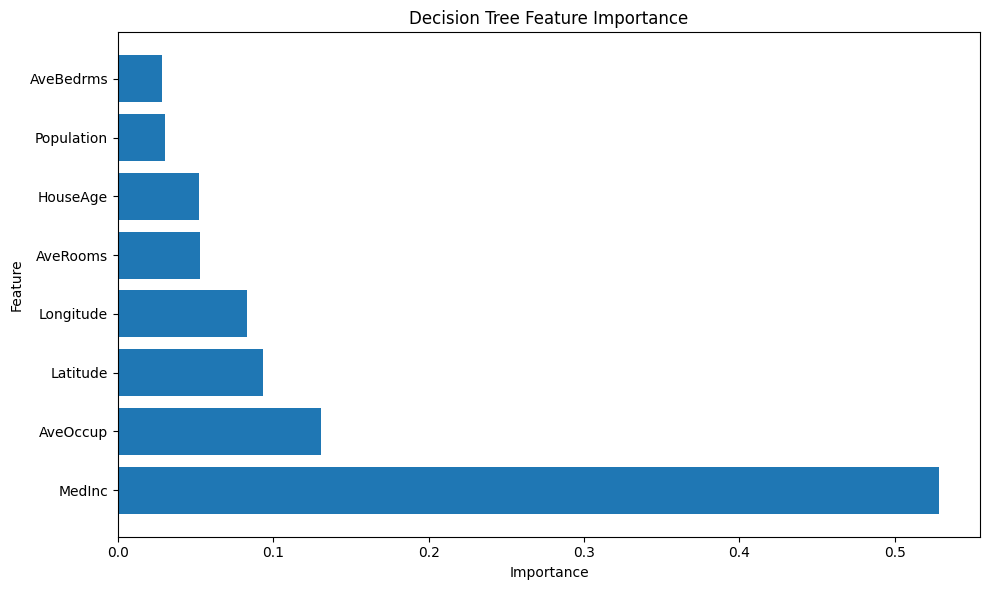

In [6]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Decision Tree Feature Importance')
plt.tight_layout()
plt.show()